**1.** 데이터 설명   

>InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  
>StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
>Description: Product (item) name. Nominal.  
>Quantity: The quantities of each product (item) per transaction. Numeric.  
>InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.  
>UnitPrice: Unit price. Numeric, Product price per unit in sterling.  
>CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
>Country: Country name. Nominal, the name of the country where each customer resides.  



In [1]:
import pandas as pd
df = pd.read_csv('./problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


**1-1** 결측치를 확인하고, 결측치 제거할 것

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [3]:
df.dropna(inplace=True)

* `Quantity`, `UnitPrice` 결측치 존재
* 결측치 처리 방법 : 결측치 제거, 결측치 대체 등 존재
```python
df = df.dropna()  # 결측치가 있는 모든 행을 삭제합니다.
df = df.dropna(axis=1)  # 결측치가 있는 모든 열을 삭제합니다.
```
```python
df = df.fillna(0)  # 결측치를 0으로 대체합니다.
df = df.fillna(method='ffill')  # 결측치를 앞의 값으로 대체합니다.
df = df.fillna(method='bfill')  # 결측치를 뒤의 값으로 대체합니다.
```

**1-2** 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

이상치(outlier)란 대다수의 데이터와는 다른 극단적인 값을 가지는 데이터를 말합니다. 이상치는 데이터 분석의 정확성을 해치하므로, 이상치를 제거하는 것은 데이터 분석에서 중요한 단계 중 하나입니다.  

Python에서는 numpy, scipy, pandas 등 다양한 패키지를 활용하여 이상치를 제거할 수 있습니다. 이상치를 제거하는 방법에는 여러 가지가 있지만, 가장 간단한 방법은 이상치를 1사분위수와 3사분위수 사이에 위치한 값들로 대체하는 것입니다. 이를 Tukey 방법이라고도 합니다.  

1. 이상치 확인하기  
이상치를 확인하기 위해 데이터의 분포를 시각화하여 살펴볼 수 있습니다. 가장 간단한 방법은 박스 플롯(box plot)을 그려보는 것입니다. 박스 플롯은 데이터의 중앙값, 사분위수, 이상치를 한눈에 볼 수 있게 해주는 시각화 도구입니다.  

```python 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df = pd.read_csv('data.csv')
sns.boxplot(x=df['column_name'])
plt.show()
```

2. 이상치 제거하기  
이상치를 제거하기 위해서는 이상치의 경계를 정해야 합니다. 가장 일반적인 방법은 Tukey 방법으로, 이상치의 경계는 1사분위수 - 1.5 * IQR와 3사분위수 + 1.5 * IQR입니다. IQR은 사분위 범위(IQR, Interquartile Range)로, 3사분위수와 1사분위수의 차이를 나타냅니다.  

```python
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 이상치를 경계값으로 대체합니다.
df['column_name'] = np.where(df['column_name'] < lower_bound, lower_bound, df['column_name'])
df['column_name'] = np.where(df['column_name'] > upper_bound, upper_bound, df['column_name'])
```

3. 이상치 제거 후 통계적으로 나타내기  


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df = df[~df['InvoiceNo'].map(lambda x: x[0]=='C')]

d:\Users\kang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


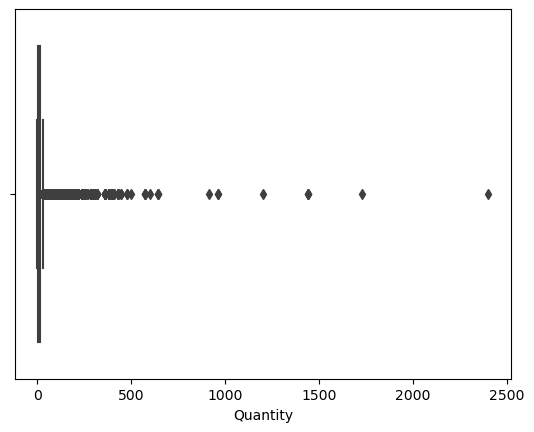

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['Quantity'])
plt.show()

d:\Users\kang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


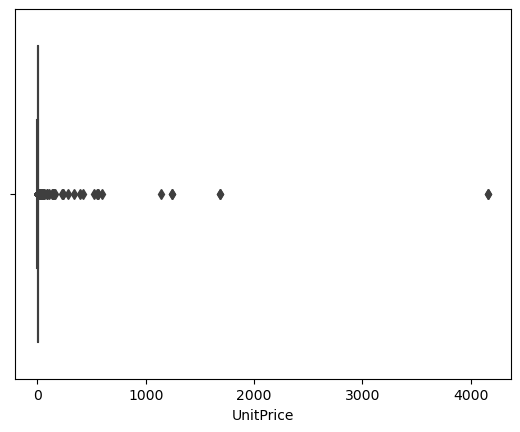

In [7]:
sns.boxplot(df['UnitPrice'])
plt.show()

In [8]:
import numpy as np

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Quantity'] = np.where(df['Quantity'] < 0, 0, df['Quantity'])
df['Quantity'] = np.where(df['Quantity'] > upper_bound, upper_bound, df['Quantity'])

In [9]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['UnitPrice'] = np.where(df['UnitPrice'] < lower_bound, lower_bound, df['UnitPrice'])
df['UnitPrice'] = np.where(df['UnitPrice'] > upper_bound, upper_bound, df['UnitPrice'])

d:\Users\kang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


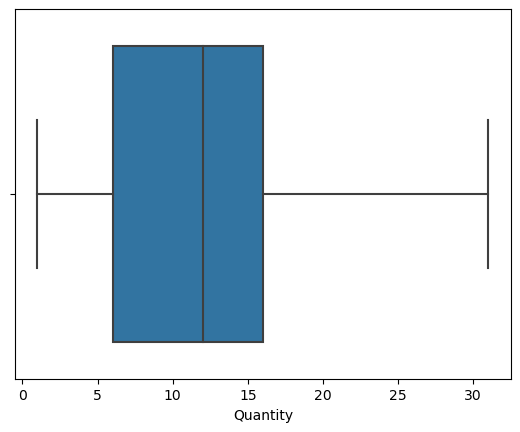

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['Quantity'])
plt.show()

d:\Users\kang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


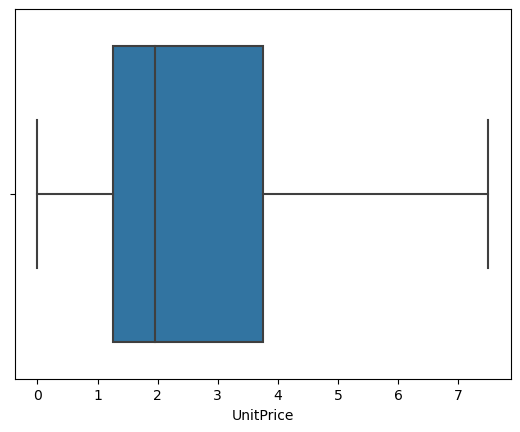

In [11]:
sns.boxplot(df['UnitPrice'])
plt.show()

In [12]:
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

**1-3** 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

K-means와 DBSCAN은 비지도 학습(Unsupervised Learning) 알고리즘 중에서 가장 일반적으로 사용되는 군집(Clustering) 알고리즘입니다. 둘 다 데이터를 군집화하여 비슷한 특성을 갖는 데이터들끼리 묶어주는 역할을 합니다.

K-means 알고리즘은 데이터를 K개의 군집으로 묶어주는 알고리즘입니다. 먼저, 초기 중심점(Centroids)을 설정하고, 각 데이터와 가장 가까운 중심점을 기준으로 군집을 형성합니다. 그리고, 군집의 중심점을 다시 계산하고, 중심점이 바뀔 때까지 이 과정을 반복합니다. K-means 알고리즘은 비교적 간단하고 빠르게 수행할 수 있지만, 초기 중심점의 설정에 따라 결과가 달라질 수 있으며, 군집의 개수 K를 직접 지정해주어야 한다는 단점이 있습니다.

반면, DBSCAN 알고리즘은 데이터가 밀집되어 있는 지역을 군집으로 묶어줍니다. 이 알고리즘은 epsilon(ε)과 minPts라는 두 개의 하이퍼파라미터를 사용합니다. epsilon은 데이터 포인트 간의 거리를 기준으로 밀집 지역을 정의하고, minPts는 한 군집에 속해야 할 최소 데이터 포인트의 수를 정의합니다. DBSCAN 알고리즘은 밀집 지역과 이웃하지 않는 데이터를 잡음(Noise)으로 처리하며, 군집의 개수를 지정해주지 않아도 자동으로 찾아줍니다.

이 두 알고리즘은 각각 장단점이 있으며, 사용할 데이터에 따라 적합한 알고리즘을 선택해야 합니다.

In [13]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()  
# df['InvoiceNo'] = le.fit_transform(df['InvoiceNo'])  
# df['StockCode'] = le.fit_transform(df['StockCode'])  
df['Description_PP'] = le.fit_transform(df['Description'])  
# df['InvoiceDate'] = le.fit_transform(df['InvoiceDate'])  
# df['CustomerID'] = le.fit_transform(df['CustomerID'])  
# df['Country'] = le.fit_transform(df['Country'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34688 entries, 0 to 35800
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       34688 non-null  object 
 1   StockCode       34688 non-null  object 
 2   Description     34688 non-null  object 
 3   Quantity        34688 non-null  float64
 4   InvoiceDate     34688 non-null  object 
 5   UnitPrice       34688 non-null  float64
 6   CustomerID      34688 non-null  float64
 7   Country         34688 non-null  object 
 8   Total_Price     34688 non-null  float64
 9   Description_PP  34688 non-null  int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 2.8+ MB


In [15]:
target = pd.DataFrame()
target['CustomerID'] = df['CustomerID'].value_counts().index
target['CountByCustomerID'] = df['CustomerID'].value_counts().values
target = pd.merge(target, df.groupby(by='CustomerID').sum().reset_index().loc[:,['CustomerID', 'Total_Price']], on='CustomerID')
target 

,CustomerID,CountByCustomerID,Total_Price
0,14911.0,5651,114959.56
1,14646.0,2077,96888.17
2,14156.0,1397,51882.63
3,12681.0,637,12179.12
4,12682.0,524,10411.05
...,...,...,...
282,12789.0,4,30.00
283,12734.0,4,110.40
284,12665.0,3,52.50
285,12603.0,3,285.00


d:\Users\kang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


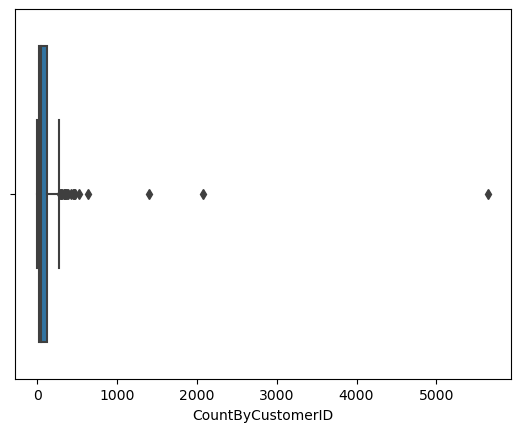

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(target['CountByCustomerID'])
plt.show()

d:\Users\kang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


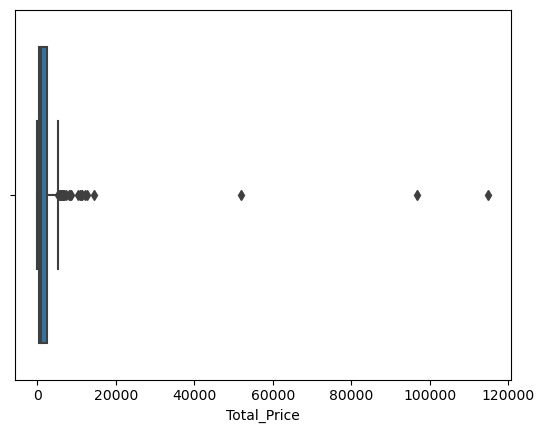

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(target['Total_Price'])
plt.show()

In [18]:
Q1 = target['CountByCustomerID'].quantile(0.25)
Q3 = target['CountByCustomerID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
target['CountByCustomerID'] = np.where(target['CountByCustomerID'] < lower_bound, lower_bound, target['CountByCustomerID'])
target['CountByCustomerID'] = np.where(target['CountByCustomerID'] > upper_bound, upper_bound, target['CountByCustomerID'])

In [19]:
Q1 = target['Total_Price'].quantile(0.25)
Q3 = target['Total_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
target['Total_Price'] = np.where(target['Total_Price'] < lower_bound, lower_bound, target['Total_Price'])
target['Total_Price'] = np.where(target['Total_Price'] > upper_bound, upper_bound, target['Total_Price'])

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 클러스터별 콜린스키 하라바츠 결과 비교
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(target)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(target, labels))

827.4040621781678
839.5858638376619
758.6385668977113
806.1523037688843
805.0907635927877
861.2646397741249
991.6290930645528
1095.680422843926


In [21]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

d:\Users\kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


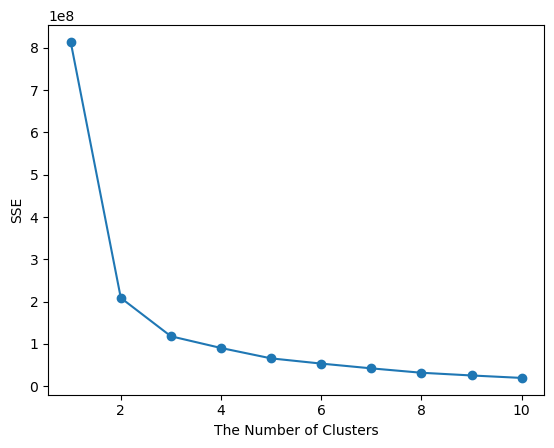

[814085384.2819817, 208570197.11530352, 117768734.07292637, 90032728.97555637, 65468395.33203403, 53119806.377348304, 41843089.88685579, 31456665.468973033, 25025394.33840473, 19215987.215572942]


In [22]:
elbow(target)

In [24]:
from sklearn.cluster import KMeans
import numpy as np


# K-means 알고리즘으로 군집 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(target)

# 군집 결과 출력
# print(kmeans.labels_)


KMeans(n_clusters=3)

In [25]:
target['class'] = kmeans.labels_

In [26]:
target.columns

Index(['CustomerID', 'CountByCustomerID', 'Total_Price', 'class'], dtype='object')

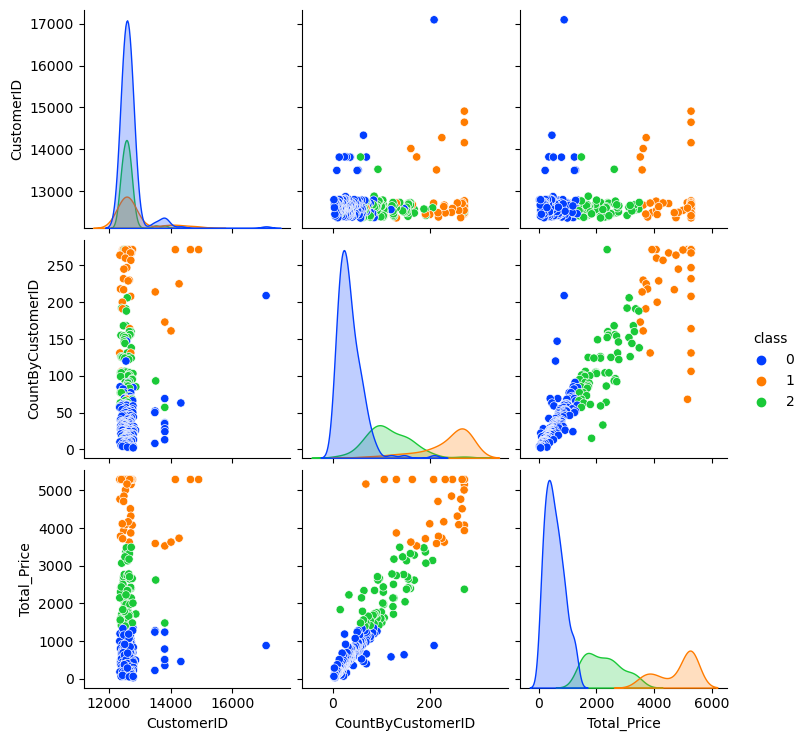

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(target,
             diag_kind='kde',
             hue="class",
#            corner = True,  #직각삼각형 모양으로 산점도 행렬 만드려면 주석해제
             palette='bright')
plt.show()

**2-1** 위에서 생성한 군집들의 특성을 분석할 것

0 : 
1 : 
2 : 

**2-2** 각 군집 별 대표 추천 상품을 도출할 것

In [28]:
target['class'].value_counts()

0    180
2     61
1     46
Name: class, dtype: int64

**2-3** CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [29]:
target[target['CustomerID']==12413]

,CustomerID,CountByCustomerID,Total_Price,class
163,12413.0,38.0,680.2,0


In [30]:
df[df['CustomerID']==12413].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Description_PP
91,569402,22457,NATURAL SLATE HEART CHALKBOARD,6.0,10/4/2011 9:00,2.95,12413.0,France,17.7,1513
567,569402,22138,BAKING SET 9 PIECE RETROSPOT,6.0,10/4/2011 9:00,4.95,12413.0,France,29.7,191
749,550338,23051,RECYCLED ACAPULCO MAT BLUE,2.0,4/17/2011 15:33,7.50,12413.0,France,15.0,1847
1683,540365,22750,FELTCRAFT PRINCESS LOLA DOLL,4.0,1/6/2011 16:12,3.75,12413.0,France,15.0,855
2349,569402,POST,POSTAGE,1.0,10/4/2011 9:00,7.50,12413.0,France,7.5,1818


해당 고객은 class 가 0으로 분류되어있다.   
0번 고객은 비교적 총 구매액과 총 구매 횟수가 낮은 그룹인 것이 특징이다.  
따라서 0번 그룹에서 구매한 상품들을 추천하면 해당 고객의 구매 가능성이 높을 것이라고 예상할 수 있다.  

In [31]:
df[df['CustomerID'].isin(target[target['class'].map(lambda x: x==0)]['CustomerID'])]['Description'].value_counts()

POSTAGE                                288
ROUND SNACK BOXES SET OF4 WOODLAND      54
PLASTERS IN TIN WOODLAND ANIMALS        38
BAKING SET 9 PIECE RETROSPOT            32
PACK OF 72 RETROSPOT CAKE CASES         32
                                      ... 
BLUE POT PLANT CANDLE                    1
AIRLINE LOUNGE,METAL SIGN                1
GREEN GIANT GARDEN THERMOMETER           1
PANTRY PASTRY BRUSH                      1
12 MESSAGE CARDS WITH ENVELOPES          1
Name: Description, Length: 1660, dtype: int64

In [32]:
len(set(df[df['CustomerID'].isin(target[target['class'].map(lambda x: x==0)]['CustomerID'])]['Description']))
recommend = list(set(df[df['CustomerID'].isin(target[target['class'].map(lambda x: x==0)]['CustomerID'])]['Description'].value_counts().index))
recommend[:5]

['GLASS STAR FROSTED T-LIGHT HOLDER',
 'FAIRY CAKES NOTEBOOK A6 SIZE',
 'OFFICE MUG WARMER POLKADOT',
 'WHITE GOOSE FEATHER CHRISTMAS TREE ',
 'EASTER TIN BUNNY BOUQUET']

**3** 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [14]:
import scipy.stats as stats
1.64*1.64*0.09/(0.05*0.05)

96.82559999999997

**4** 다음은 1월부터 9월까지의 은의 가격이다
![image](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem2.png?raw=true)


**4-1** 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [33]:
import numpy as np
import pandas as pd
silver = np.array([12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38])
silver

array([12.14, 42.6 , 34.4 , 35.29, 30.96, 57.12, 37.84, 42.49, 31.38])

<AxesSubplot:>

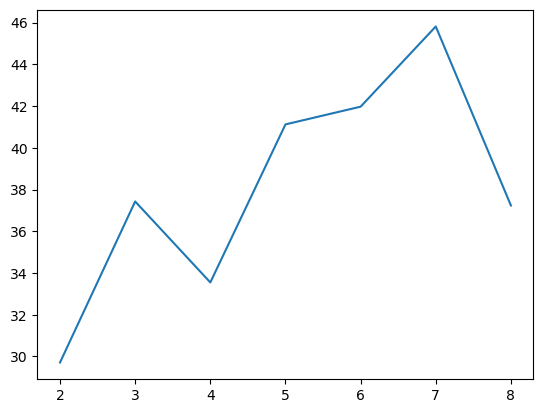

In [34]:
df = pd.DataFrame({'silver':silver})
df['silver'].rolling(3).mean().plot()

**4-2** 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [35]:
print(str((round((31.38 - 12.14)/12.14,4) - 1)*100) + '%')

58.48%


**5** A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다.자치구별 지지율이 같은지에 대해서 검정하라
![image](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem3.png?raw=true)

**5-1** 연구가설과 귀무가설을 설정하라

A, B, C 자치구에서 W 의원에 대한 찬성, 반대, 지지 표를 수집했다면, 이를 이용하여 자치구별 지지율이 같은지 검정할 수 있습니다.  

가설 설정:  

귀무가설 H0: 자치구별 지지율이 모두 같다.  
대립가설 H1: 자치구별 지지율 중 적어도 하나는 다르다.  

**5-2** 검정통계량 구하고 결론을 내라

In [36]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
A = [176, 124]
B = [193, 107]
C = [159, 141]
df = pd.DataFrame({'A':A, 'B': B, 'C':C}, index=['찬성','반대'])


chi, p, df, expect = chi2_contingency(df) 

print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

print("\n p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각")
print("\n 자치구별 찬성/반대는 동일하지 않다고 할 수 있다. ")

Statistic: 7.945381231671554
p-value: 0.01882272023214683
df: 2
expect: 
 [[176. 176. 176.]
 [124. 124. 124.]]

 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각

 자치구별 찬성/반대는 동일하지 않다고 할 수 있다. 


**6** A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem4.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [37]:
df = pd.read_csv('./problem6.csv')
df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


**6-1** 연구가설과 귀무가설 설정하라

독립표본 T-검정 개념   
* 두 개의 독립된 모집단의 평균을 비교
* 모집단, 모수, 표본이 모두 두 개씩 존재
* 가정
>두 모집단은 정규성 만족해야함  
>두 모집단의 분산이 서로 같아야 함 (등분산성 가정)  
>독립변수는 범주형, 종속변수는 연속형  

* 가설 검정  
> 귀무가설 : 남녀 집단의 평균 혈압은 동일하다.  
> 대립가설 : 남녀 집단의 평균 혈압은 다르다.  

**6-2** 통계량을 구하고, 연구가설 채택여부를 기술하라

In [38]:
import scipy.stats as stats

female = df.loc[df.gender == 'female', ['pressure']]
male = df.loc[df.gender == 'male', ['pressure']]


statistic, pvalue = stats.ttest_ind(female, male, equal_var=True)

print('t-value:', statistic)
print('p-value:', p)

print("\np-value가 유의수준 0.05보다 크므로 귀무가설을 채택")
print("\n따라서 남녀 평균 혈압은 동일하다. ")

t-value: [-1.59833502]
p-value: 0.01882272023214683

p-value가 유의수준 0.05보다 크므로 귀무가설을 채택

따라서 남녀 평균 혈압은 동일하다. 


**6-3** 6-2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [39]:
import scipy.stats as stats

n = len(male)
x_bar = male.mean()[0]
s = male.std()[0]
alpha = 0.05
df = n - 1

interval = stats.t.interval(alpha=1-alpha, df=df, loc=x_bar, scale=s/(n**0.5))
interval

(91.45648960964819, 100.98101039035184)

In [40]:
import scipy.stats as stats

n = len(female)
x_bar = female.mean()[0]
s = female.std()[0]
alpha = 0.05
df = n - 1

interval = stats.t.interval(alpha=1-alpha, df=df, loc=x_bar, scale=s/(n**0.5))
interval

(81.91756912051609, 97.9046531017061)

**7** height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라.  
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.  
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다  

In [7]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import pymc3 as pm
import numpy as np
np.random.seed(1234)
import matplotlib as mpl
import matplotlib.pyplot as plt

df=pd.read_csv('problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


In [41]:
np.random.uniform()

0.652222894393365

**7-1**  
아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.  
베이지안 회귀  
시드넘버 1234로 지정  
1000번의 burn-in 이후 10,000의 MCMC(마르코프 연쇄 몬테카를로)를 수행  
회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.  

In [17]:
height= df['height']
weight = df['weight']
waistline = df['waistline']

with pm.Model() as model:
    b0 = pm.Uniform('b0', lower=1, upper=100)
    b1 = pm.Uniform('b1', lower=1, upper=100)
    b2 = pm.Uniform('b2', lower=1, upper=100)
    sigma = pm.InverseGamma('sigma', alpha=0.005, beta=0.005)
    
    mu = b0 + b1*height + b2*waistline
    
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=weight)
    
    trace = pm.sample(100, tune=1000, cores=1, random_seed=1234)
pm.summary(trace, var_names=['b0', 'b1', 'b2', 'sigma'])

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b2, b1, b0]


ValueError: Mass matrix contains zeros on the diagonal. 
The derivative of RV `b0_interval__`.ravel()[0] is zero.

위 코드에서는 pm.Flat을 사용하여 회귀계수의 사전분포를 부적절한 균일분포로 지정했으며, pm.InverseGamma를 사용하여 오차항의 분산의 사전분포를 역감마 분포로 지정했습니다.

pm.sample 함수를 사용하여 MCMC를 실행합니다. draws 인수는 샘플링 횟수를, tune 인수는 버닝-인(burn-in) 횟수를, chains 인수는 체인 수를 설정합니다.

마지막으로, pm.traceplot 함수를 사용하여 사후분포를 시각화합니다. var_names 인수에 추정하려는 변수의 이름을 리스트 형태로 전달합니다.

**7-2** 7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라